In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [96]:
tb=pd.read_csv("startup.csv")
tb.head(5)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [97]:
tbt = tb[['RDSpend','Administration','MarketingSpend','Profit']]
tbt.head(5)

,RDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


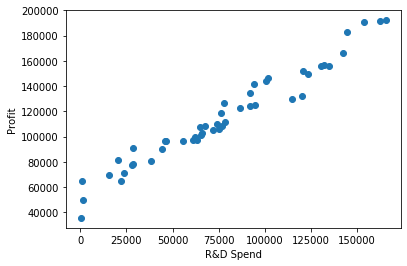

In [98]:
plt.scatter(tbt.RDSpend, tbt.Profit)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

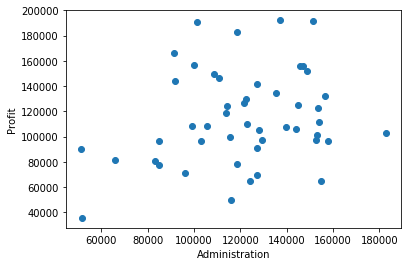

In [99]:
plt.scatter(tbt.Administration,tbt.Profit)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

In [115]:
msk = np.random.rand(len(tbt)) < 0.7
train = tbt[msk]
test = tbt[~msk]

In [126]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['RDSpend']])
train_y = np.asanyarray(train[['Profit']])
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept:',regr.intercept_)

Coefficients:  [[0.79159599]]
Intercept: [54348.20247095]


Text(0, 0.5, 'Profit')

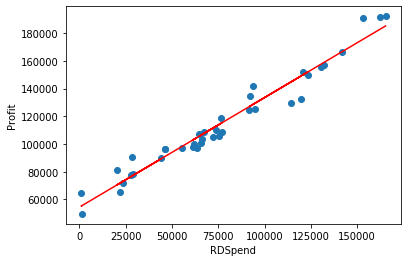

In [127]:
plt.scatter(train.RDSpend,train.Profit)
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("RDSpend")
plt.ylabel("Profit")

In [128]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['RDSpend']])
test_y = np.asanyarray(test[['Profit']])
test_y_hat = regr.predict(test_x)

print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


R2-score: 0.92
